In [2]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from parallel_two_qubit_gate_decomposition import *
from gates_numpy import cnot_gate, fsim_gate, cphase_gate, xy_gate, get_gate_unitary_qiskit, iswap, fsim
from itertools import product
from qiskit.transpiler import PassManager
#test

In [3]:
import sys
sys.path.append('../..')
from utils.riswap_gates.riswap import RiSwapGate

In [4]:
qc = QuantumCircuit(2)
from qiskit.quantum_info import random_unitary
qc.append(random_unitary(dims=(2,2)),[0,1])
qc.draw(output='mpl')

from qiskit.converters import circuit_to_dag, dag_to_circuit
dag = circuit_to_dag(qc)

In [10]:
[1/el for el in np.linspace(1,8,8)]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125]

In [11]:
n = 5
alpha_range = np.linspace(1,8,8)
data = np.zeros((len(alpha_range),n))
best_fid = np.zeros((len(alpha_range),n))

for j in range(n):
    qc = QuantumCircuit(2)
    qc.append(random_unitary(dims=(2,2)),[0,1])
    qc.draw(output='mpl')
    dag = circuit_to_dag(qc)
    for index, i in enumerate(alpha_range):
        alpha = 1/i
        fid_2q = {(0,1):[1-alpha*(1-.9832)]}
        params = [[alpha]]
        gate_labels = [f'$iSwap^{alpha}$']
        gate_defs = [RiSwapGate]
    
        pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-8)
        approx = pgrp.run(dag)
        # print(dag_to_circuit(approx).draw())
        print(alpha, len(approx.two_qubit_ops()))
        print(pgrp.property_set["best_fid"])
        data[index][j] = len(approx.two_qubit_ops())
        best_fid[index][j] = pgrp.property_set["best_fid"]

1.0 3
0.9504419782672558
0.5 2
0.9794765224882787
0.3333333333333333 3
0.9832939041836063
0.25 3
0.9817089615414122
0.2 5
0.9833125172295775
0.16666666666666666 5
0.9855604100917345
0.14285714285714285 6
0.9856275264061355
0.125 7
0.9853922864193109
1.0 2
0.9641035913892942
0.5 2
0.9832705594356175
0.3333333333333333 3
0.9832939039410816
0.25 4
0.9833055394316407
0.2 5
0.983312516725157
0.16666666666666666 5
0.9834325515392542
0.14285714285714285 7
0.983320477083779
0.125 7
0.9845822275263779
1.0 2
0.9592903796907211
0.5 2
0.9832705598774232
0.3333333333333333 2
0.9858517841095924
0.25 3
0.9873793609788958
0.2 4
0.9866275857256963
0.16666666666666666 4
0.9858673247933131
0.14285714285714285 5
0.9872572084779884
0.125 6
0.9873917065715261
1.0 2
0.9574776962487702
0.5 2
0.9832705597876511
0.3333333333333333 2
0.9876748623020163
0.25 3
0.9874528457377042
0.2 4
0.9866275857980755
0.16666666666666666 4
0.9876904188234894
0.14285714285714285 5
0.9880443627923793
0.125 6
0.9874659629792386
1.

In [1]:
# fid_2q = {(0,1):[1]}
# n = 10
# alpha_range = np.linspace(1,10,10)
# data = np.zeros((len(alpha_range),n))

# for j in range(n):
#     qc = QuantumCircuit(2)
#     qc.append(random_unitary(dims=(2,2)),[0,1])
#     qc.draw(output='mpl')
#     dag = circuit_to_dag(qc)
#     for index, i in enumerate(alpha_range):
#         alpha = 1/i
#         params = [[alpha]]
#         gate_labels = [f'$iSwap^{alpha}$']
#         gate_defs = [RiSwapGate]

#         pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-8)
#         approx = pgrp.run(dag)
#         # print(dag_to_circuit(approx).draw())
#         print(alpha, len(approx.two_qubit_ops()))
#         print(pgrp["best_fid"])
#         data[index][j] = len(approx.two_qubit_ops())

NameError: name 'np' is not defined

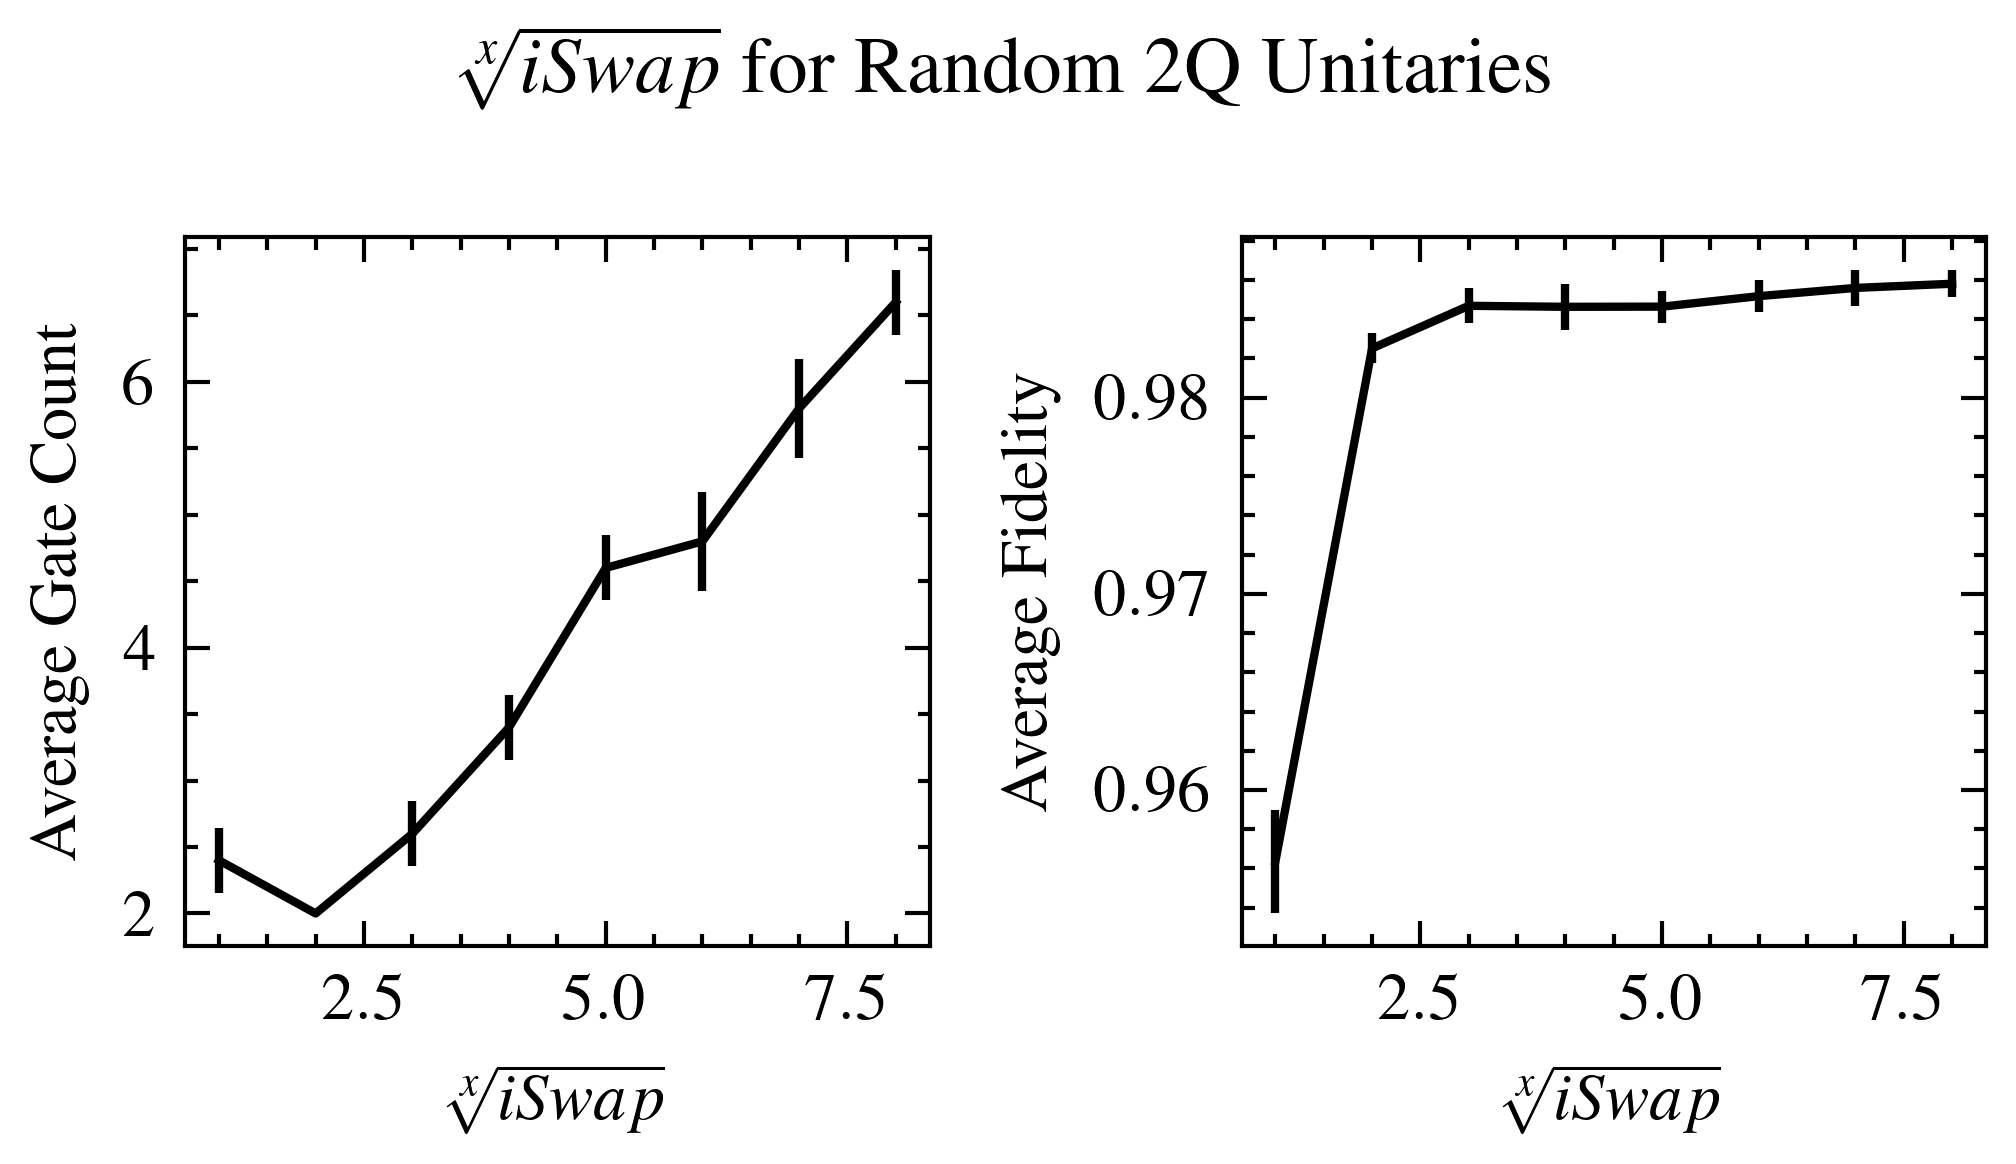

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import sem
plt.style.use(['science', 'ieee'])
fig, axs = plt.subplots(1, 2, figsize=(3.5,2))
axs[0].errorbar(alpha_range, data.mean(axis=1), yerr=sem(data, axis=1))
axs[0].set_xlabel(r"$\sqrt[x]{iSwap}$")
axs[0].set_ylabel("Average Gate Count")
fig.suptitle(r"$\sqrt[x]{iSwap}$ for Random 2Q Unitaries")
axs[1].errorbar(alpha_range, best_fid.mean(axis=1),yerr=sem(best_fid, axis=1))
axs[1].set_xlabel(r"$\sqrt[x]{iSwap}$")
axs[1].set_ylabel("Average Fidelity")
plt.tight_layout()

Text(0.5, 1.0, 'RISWAP count for NuOp Random 2Q Unitary')

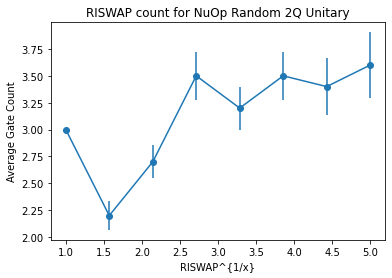

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import sem

plt.errorbar(alpha_range, data.mean(axis=1), yerr=sem(data, axis=1), fmt='-o')
plt.xlabel("RISWAP^{1/x}")
plt.ylabel("Average Gate Count")
plt.title("RISWAP count for NuOp Random 2Q Unitary")

iswap duration * avg gate count = avg total duration

iswap^{1/5}
.2 * 3.75 = .75

iswap^{1/2}
.5 * 2.5 = 1.25

In [24]:
data.mean(axis=1)

array([3. , 2.5, 3.4, 3.6, 3.8])

## Decomposition example with a single two-qubit gate 

In [38]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
# fid_2q = {(0,1):[1]}
fid_2q = dict.fromkeys([(i,j) for i,j in product(range(qc.num_qubits), repeat=2) if i!=j], [1])
params = [[1/2]]
gate_labels = ['$iSwap^{1/2}$']
gate_defs = [iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.000001)
# pm = PassManager([pgrp, re])
pm = PassManager([pgrp])
circ_trans = pm.run(qc)
# print(re.property_set)
circ_trans.draw(output='mpl')

In [2]:
# CNOT gate in the circuit
my_op = np.matrix([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,0,1],
                   [0,0,1,0]])

In [3]:
test_circuit = QuantumCircuit(2)
test_circuit.unitary(my_op, [0,1])

In [4]:
test_circuit = QuantumCircuit(2)
test_circuit.cx(0,1)

In [6]:
# Assume the HW supports the Google SYC gate. This is an underlying fsim_gate. 
# So we pass the fsim_gate function in the gate_defs,
# we pass the desired SYC parameters (theta=pi/2, phi=pi/6) in the params, we pass a label for circuit drawing, 
# and we pass the calibration fidelity of this gate on qubits 0 and 1

# fid_2q = {(0,1): [0.995]} 
fid_2q = {(0,1):[1]}
# params = [[np.pi/2, np.pi/6]]
params = [[1/2]]
gate_labels = ['$iSwap^{1/2}$']
# gate_defs = [fsim_gate]
gate_defs = [iswap]

# All these inputs get passed to the gate decomposition pass. 
# Ignore the [1 to 54] loop (that was from our assumption of Sycamore hardware, but I believe it no longer plays a role)
# tolerance defines the fidelity accuracy we want from the decomposition. If you set the tol=0.1 or so, you can see that 
# lesser two-qubit gates are used.

pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0)
approx_cz = pgrp.run(test_circuit)

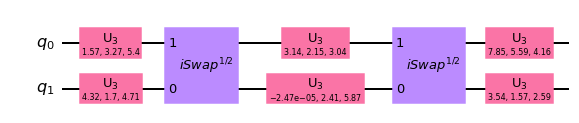

In [7]:
approx_cz.draw(output='mpl')

## Decomposition example with two circuit gates with two hardware gates

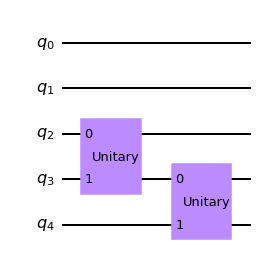

In [8]:
test_circuit = QuantumCircuit(5)
test_circuit.unitary(my_op, [2,3])
test_circuit.unitary(my_op, [3,4])
test_circuit.draw(output='mpl')

In [11]:
# fid_2q = {(2,3): [0.94, #CZ fidelity
#                   0.99],#XY fidelity
#           (3,4): [0.93, #CZ
#                   0.96]}#XY
# params = [[np.pi], 
#           [np.pi]]
# gate_labels = ['CZ', 
#                'XY']
# gate_defs = [cphase_gate, 
#              xy_gate]
# pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.00000001)
# approx = pgrp.run(test_circuit)

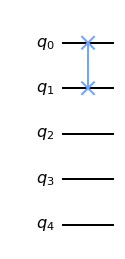

In [28]:
test_circuit = QuantumCircuit(5)
test_circuit.swap(0,1)
test_circuit.draw(output='mpl')

In [37]:
fid_2q = {(2,3): [1, 1],
          (3,4): [1,1],
          (0,4): [1,1],
          (0,1): [1,1]}
params = [[1/2], 
          [1/2]]
gate_labels = ['iSwap^1/2$', 
               'iSwap^1/2$']
gate_defs = [iswap, 
             iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0)
approx = pgrp.run(test_circuit)

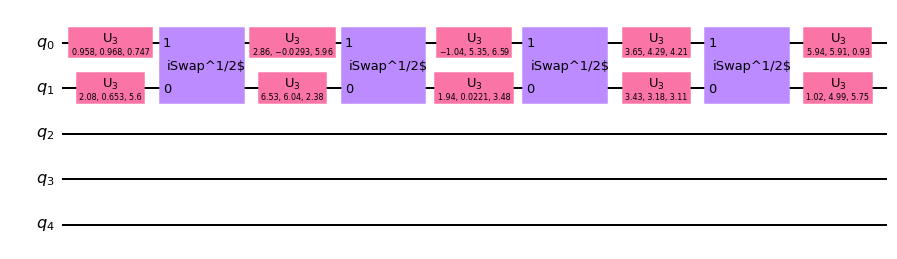

In [38]:
approx.draw(output='mpl')

In [39]:
fid_2q = {(2,3): [1, 1],
          (3,4): [1,1],
          (0,4): [1,1],
          (0,1): [1,1]}
params = [[1], 
          [1]]
gate_labels = ['iSwap^1$', 
               'iSwap^1$']
gate_defs = [iswap, 
             iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0)
approx = pgrp.run(test_circuit)

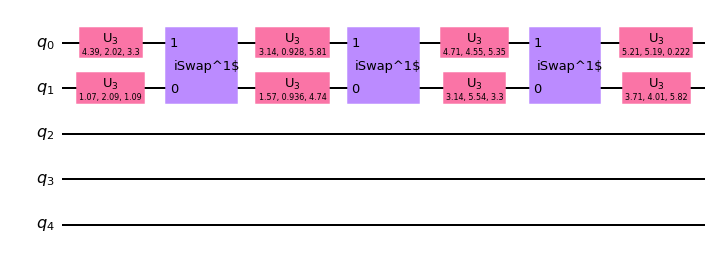

In [41]:
approx.draw(output='mpl')

## Multi-qubit unitary example

In [118]:
# from parallel_multi_qubit_gate_decomposition import *

In [119]:
# test_circuit = QuantumCircuit(4)
# my_op = np.kron(fsim_gate(np.pi/2, np.pi/6), fsim_gate(np.pi/3, np.pi/6)) #creating a test unitary by multiplying two fsim gates
# test_circuit.unitary(my_op, [0,1,2,3])

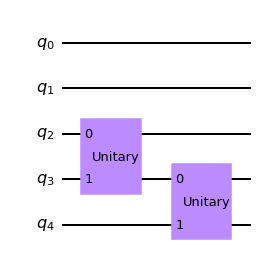

In [120]:
test_circuit.draw(output='mpl')

In [121]:
# fid_2q = {(0,1): [0.99, 0.99],
#           (1,2): [0.99, 0.99],
#           (2,3): [0.94, #CZ fidelity
#                   0.99],#XY fidelity
#           (3,4): [0.93, #CZ
#                   0.96]}#XY
# params = [[np.pi], 
#           [np.pi]]
# gate_labels = ['CZ', 
#                'XY']
# gate_defs = [cphase_gate, 
#              xy_gate]
# pgrp = MultiQubitGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0001)
# approx = pgrp.run(test_circuit)

In [122]:
# approx.draw()